In [22]:
import os
from PIL import Image
import numpy as np
import keras
import os
import cv2
from matplotlib import pyplot as plt
from keras.applications.vgg16 import VGG16
from keras.preprocessing import image
from keras.applications.vgg16 import preprocess_input
import numpy as np
from keras.applications.vgg16 import decode_predictions

vggModel = VGG16(weights='imagenet', include_top=False)

from keras.applications.resnet50 import ResNet50
# load model
resModel = ResNet50(weights='imagenet',include_top=False)


X = []
Y = []
classCount = 0

base_path='images'

source_path=base_path
for child in os.listdir(source_path):
    classCount +=1
    print(child)
    sub_path = os.path.join(source_path, child)
    if os.path.isdir(sub_path):
        for data_file in os.listdir(sub_path):
            Qry = Image.open(os.path.join(sub_path, data_file))
            Qry = Qry.convert("RGB")
            Qry = np.array(Qry.resize((100,100)))
            Qry = Qry.reshape([-1,100,100,3])
            resModel_features=(resModel.predict([Qry])).flatten()
            X.append(resModel_features)
            Y.append(child)
    
# print(X)
# print(Y)
print(classCount)


a
b
2


In [14]:
print(np.shape(X))
print(np.shape(Y))

(4, 32768)
(4,)


In [15]:
from sklearn.preprocessing import LabelBinarizer
labelBinarizer = LabelBinarizer()
y = labelBinarizer.fit_transform(Y)
# print(y)        


# In[6]:


from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(np.array(X), np.array(y), 
                                                    test_size=0.2, random_state=42)

import tensorflow as tf

from tensorflow.python.keras import layers
from tensorflow.python.keras import models

import random

random.seed(42)
np.random.seed(42)
# tf.set_random_seed(42)
tf.random.set_seed(42)


dnnModel=models.Sequential()

dnnModel.add(layers.Dense(5000,activation="relu",input_shape=(32768,)))
dnnModel.add(layers.Dense(2000,activation="relu"))
dnnModel.add(layers.Dense(1000,activation="relu"))
dnnModel.add(layers.Dense(500,activation="relu"))
dnnModel.add(layers.Dense(300,activation="relu"))
dnnModel.add(layers.Dense(200,activation="relu"))
dnnModel.add(layers.Dense(120,activation="relu"))
dnnModel.add(layers.Dense(30,activation="relu"))
dnnModel.add(layers.Dense(30,activation="relu"))
dnnModel.add(layers.Dense(classCount,activation="softmax"))
dnnModel.summary()


dnnModel.compile(optimizer="adam",loss="binary_crossentropy",metrics=["accuracy"])

tbCallBack=tf.keras.callbacks.TensorBoard(log_dir='Graph',histogram_freq=0,write_graph=True,write_images=True)

dnnModel.fit(X_train,y_train,epochs=15,batch_size=64,callbacks=[tbCallBack])

testloss, testAccuracy=dnnModel.evaluate(X_test,y_test)

# print(testAccuracy)

dnnModel.save_weights('my_checkpoint')

#dnnModel.load_weights('my_checkpoint')

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_30 (Dense)             (None, 5000)              163845000 
_________________________________________________________________
dense_31 (Dense)             (None, 2000)              10002000  
_________________________________________________________________
dense_32 (Dense)             (None, 1000)              2001000   
_________________________________________________________________
dense_33 (Dense)             (None, 500)               500500    
_________________________________________________________________
dense_34 (Dense)             (None, 300)               150300    
_________________________________________________________________
dense_35 (Dense)             (None, 200)               60200     
_________________________________________________________________
dense_36 (Dense)             (None, 120)              

In [16]:
Qry = Image.open("./0.jpg")
Qry = Image.open(os.path.join(sub_path, data_file))
Qry = Qry.convert("RGB")
Qry = np.array(Qry.resize((100,100)))
Qry = Qry.reshape([-1,100,100,3])

feature=(resModel.predict([Qry])).flatten()
feature = feature.reshape((-1,len(feature)))
y=dnnModel.predict_classes([feature])
print(y)

[1]


In [17]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import VotingClassifier

In [19]:

clf1 = LogisticRegression(random_state=1)
clf2 = RandomForestClassifier(n_estimators=50, random_state=1)
clf3 = GaussianNB()

eclf = VotingClassifier(
    estimators=[('lr', clf1), ('rf', clf2), ('gnb', clf3)],
    voting='hard')

for clf, label in zip([clf1, clf2, clf3, eclf], ['Logistic Regression', 'Random Forest', 'naive Bayes', 'Ensemble']):
    scores = cross_val_score(clf, X_train, y_train, scoring='accuracy', cv=2)
    print("Accuracy: %0.2f (+/- %0.2f) [%s]" % (scores.mean(), scores.std(), label))

C:\Users\user\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:672: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=2.
  % (min_groups, self.n_splits)), UserWarning)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\user\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\user\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1374, in fit
  

Accuracy: nan (+/- nan) [Logistic Regression]
Accuracy: 0.75 (+/- 0.25) [Random Forest]
Accuracy: 0.75 (+/- 0.25) [naive Bayes]


C:\Users\user\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:672: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=2.
  % (min_groups, self.n_splits)), UserWarning)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:672: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=2.
  % (min_groups, self.n

Accuracy: nan (+/- nan) [Ensemble]


In [23]:
eclf.fit(X_train, y_train,)

C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


VotingClassifier(estimators=[('lr', LogisticRegression(random_state=1)),
                             ('rf',
                              RandomForestClassifier(n_estimators=50,
                                                     random_state=1)),
                             ('gnb', GaussianNB())])

C:\Users\user\Anaconda3\lib\site-packages\sklearn\base.py:213: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  FutureWarning)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


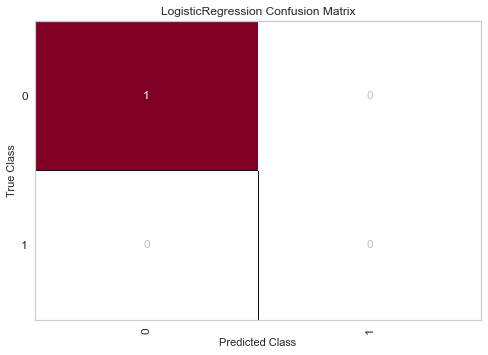

In [28]:
from yellowbrick.classifier import ConfusionMatrix
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
cm = ConfusionMatrix(
    clf1,
    label_encoder=le)

cm.fit(X_train, y_train)
cm.score(X_test, y_test)

cm.poof()
